# Creating a simple widget

Matplotlib allows you to create your own interactive widgets. Below you find an example. Try to get it to work, and play with the sliders.

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def func(x,par):
    return np.sin(par[0]*x+par[1])

def widget():
    """
    Simple widget example. Will show a sinus curve, that can be modified
    with sliders.
    """
    # Set the possible values of the parameters
    params = []
    params.append(np.linspace(0.1,2.0,10))
    params.append(np.linspace(0.,2*np.pi,12))
    
    # Compute spacing of plot, sliders and button
    hslider  = 0.03
    nslidrscl= 6
    if(len(params)>nslidrscl):
        hslider *= float(nslidrscl)/len(params)
    dyslider = hslider*(4./3.)
    xslider  = 0.3
    wslider  = 0.3
    hbutton  = 0.06
    wbutton  = 0.15
    xbutton  = 0.3
    dybutton = hbutton+0.01
    panelbot = 0.0
    controlh = panelbot + len(params)*dyslider
    controltop = panelbot + controlh
    bmargin  = 0.15
    
    # generate figure
    fig = plt.figure(figsize=(5,3))
    fig.subplots_adjust(top=0.95,bottom=controltop+bmargin)

    # Set the initial values
    indexinit = np.zeros(len(params),dtype=int)

    # select first parameter values
    par = []
    for i in range(len(params)):
        par.append(params[i][indexinit[i]])

    # Make the x array and the first f array
    x = np.linspace(0,2*np.pi,100)
    f = func(x,par)

    # set range
    ymin = -1.
    ymax = 1.
    
    # display function(s)
    ax       = plt.axes(xlim=(x.min(),x.max()),ylim=(ymin,ymax))
    axmodel, = ax.plot(x,f)
            
    sliders = []
    for i in range(len(params)):
    
        # define slider
        axcolor = 'lightgoldenrodyellow'
        axs = fig.add_axes([xslider, controltop-i*dyslider, xslider+wslider, hslider], facecolor=axcolor)

        name = 'Parameter {0:d}'.format(i)

        slider = Slider(axs, name, 0, len(params[i]) - 1,
                    valinit=indexinit[i], valfmt='%i')
        sliders.append(slider)

    class callbackplot(object):
        def __init__(self,x,func,params,sliders):
            self.x        = x
            self.func     = func
            self.params   = params
            self.sliders  = sliders
            self.closed   = False
            self.ipar     = np.zeros(len(sliders),dtype=int)
        def handle_close(self,event):
            self.closed   = True
        def myreadsliders(self):
            for isl in range(len(self.sliders)):
                ind = int(self.sliders[isl].val)
                self.ipar[isl]=ind
            par = []
            for i in range(len(self.ipar)):
                ip = self.ipar[i]
                value = self.params[i][ip]
                par.append(value)
            return par
        def myreplot(self,par):
            x = self.x
            f = self.func(x,par)
            axmodel.set_data(x,f)
            plt.draw()
        def mysupdate(self,event):
            par = self.myreadsliders()
            self.myreplot(par)

    mcb = callbackplot(x,func,params,sliders)

    mcb.mysupdate(0)

    for s in sliders:
        s.on_changed(mcb.mysupdate)

    fig._mycallback    = mcb  # Important to prevent mcb from being "garbage collected"


<IPython.core.display.Javascript object>


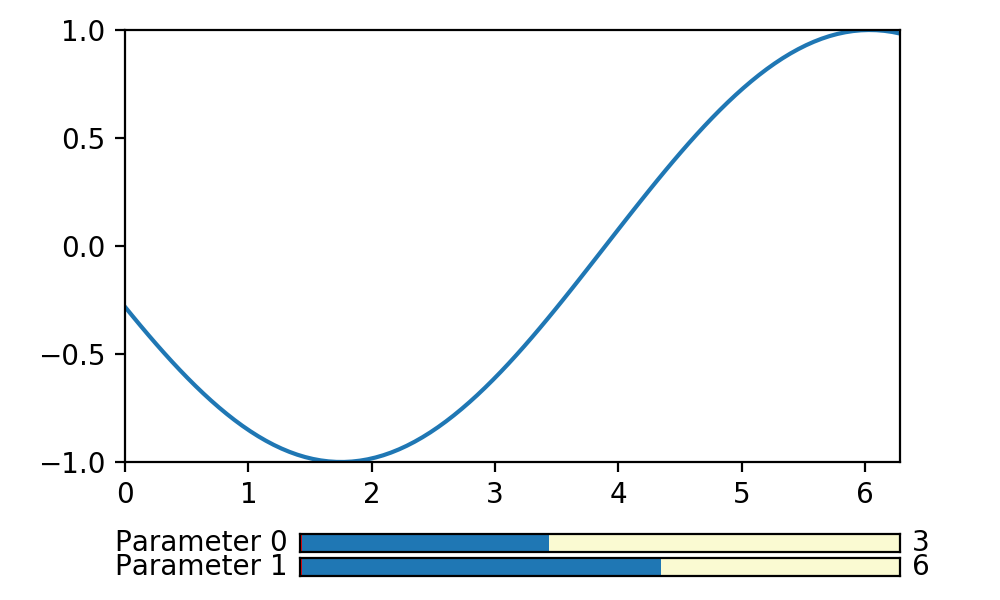

In [10]:
widget()

The challenge: modify this widget to make it a more flexible "function plotter", i.e. that the caller can provide his/her own function to be plotted, his/her own x-range, and his/her own parameters.